<a href="https://colab.research.google.com/github/Just-Aymz/Cafe-Sales/blob/main/Data_Processing/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from typing import Optional, Literal
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# **Read Files**
___

In [2]:
# Get the RAW url of the dataset file from repository
url = "https://raw.githubusercontent.com/Just-Aymz/Cafe-Sales/refs/heads/main/Data_Files/dirty_cafe_sales.csv"

# Read in the dataset using the url destination
df = pd.read_csv(url)

# **Data Identification**
___

In [3]:
# Return the shape and size of the dataset
shape = df.shape
size = df.size

print(f"The shape of the dataset is {shape}")
print(f"The size of the dataset is {size}")

The shape of the dataset is (10000, 8)
The size of the dataset is 80000


In [4]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
        'Payment Method', 'Location', 'Transaction Date'],
       dtype='object')]

In [5]:
# Return the data types of each features
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [6]:
# Return overview of the first 5 rows of the dataset
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# **Dataset Preprocessing**
___

# 1. **Miscellaneous Errors**

## 1.1 **Columns**

In [7]:
# Make a copy of the current datafame
df_2 = df.copy()

# Replace the spaces in the column names with an underscore
df_2.columns = df.columns.str.replace(' ', '_')

## 1.2 **Index**

In [8]:
# Make a copy of the current datafame
df_3 = df_2.copy()

# Make the transcation id feature the index
df_3.set_index('Transaction_ID', inplace=True)

In [9]:
# Confirm the changes
df_3.head(1)

,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location,Transaction_Date
Transaction_ID,,,,,,,
TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08


## 1.3 **Data Errors**

In [10]:
for col in df_3.columns.drop('Transaction_Date'):
  print(f"{col}: {df_3[col].unique()}\n")

Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Quantity: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

Price_Per_Unit: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

Total_Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

Payment_Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Location: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']



In [11]:
# Make a copy of the current datafame
df_4 = df_3.copy()

# Replace all the 'UNKNOWN' and the 'ERROR' values with np.nan
df_4.replace(['UNKNOWN', 'ERROR'], np.nan, inplace=True)

## 1.3 **Feature Casting**

In [12]:
# Make a copy of the current datafame
df_5 = df_4.copy()

# Cast the features to the correct features
df_5 = df_5.astype(
    {'Quantity': 'float64',
     'Total_Spent': 'float64',
     'Price_Per_Unit': 'float64',
     'Transaction_Date': 'datetime64[ns]'}
)

In [13]:
df_5.dtypes

,0
Item,object
Quantity,float64
Price_Per_Unit,float64
Total_Spent,float64
Payment_Method,object
Location,object
Transaction_Date,datetime64[ns]


# 2. **Data Cleaning**

In [14]:
def data_cleaning(
    dataframe: pd.DataFrame, operation: Literal['duplicate', 'nulls']
) -> None:
  """
  Identifies and reports the number of duplicate or null values in a given
  DataFrame.

  Parameters:
  - dataframe (pd.DataFrame): The DataFrame to analyze.
  - operation (Literal['duplicate', 'nulls']): Specifies the type of check to
  perform.
      - 'duplicate': Counts and reports duplicate rows.
      - 'nulls': Counts and reports null (NaN) values.

  Returns:
  - None: Prints the count of detected duplicate or null values.
    """
  if operation == 'duplicate':
    dupes = dataframe.duplicated().sum()
    if dupes > 0:
      print(f"{dupes} duplicate values found")
    elif dupes == 0:
      print(f"{dupes} duplicate values found")
  else:
    nulls = np.count_nonzero(dataframe.isnull().values)
    if nulls > 0:
      print(f"{nulls} null values found")
    elif nulls == 0:
      print(f"{nulls} null values found")


### 2.1 **Duplicate Values**

In [15]:
# Return the total number of duplicates in the dataset
data_cleaning(df_5, 'duplicate')

255 duplicate values found


### 2.2 **Null Values**

In [16]:
# Return the total number of null values in the dataset
data_cleaning(df_5, 'nulls')

10082 null values found


In [17]:
# Return the total null values per feature
df_5.isnull().sum()

,0
Item,969
Quantity,479
Price_Per_Unit,533
Total_Spent,502
Payment_Method,3178
Location,3961
Transaction_Date,460


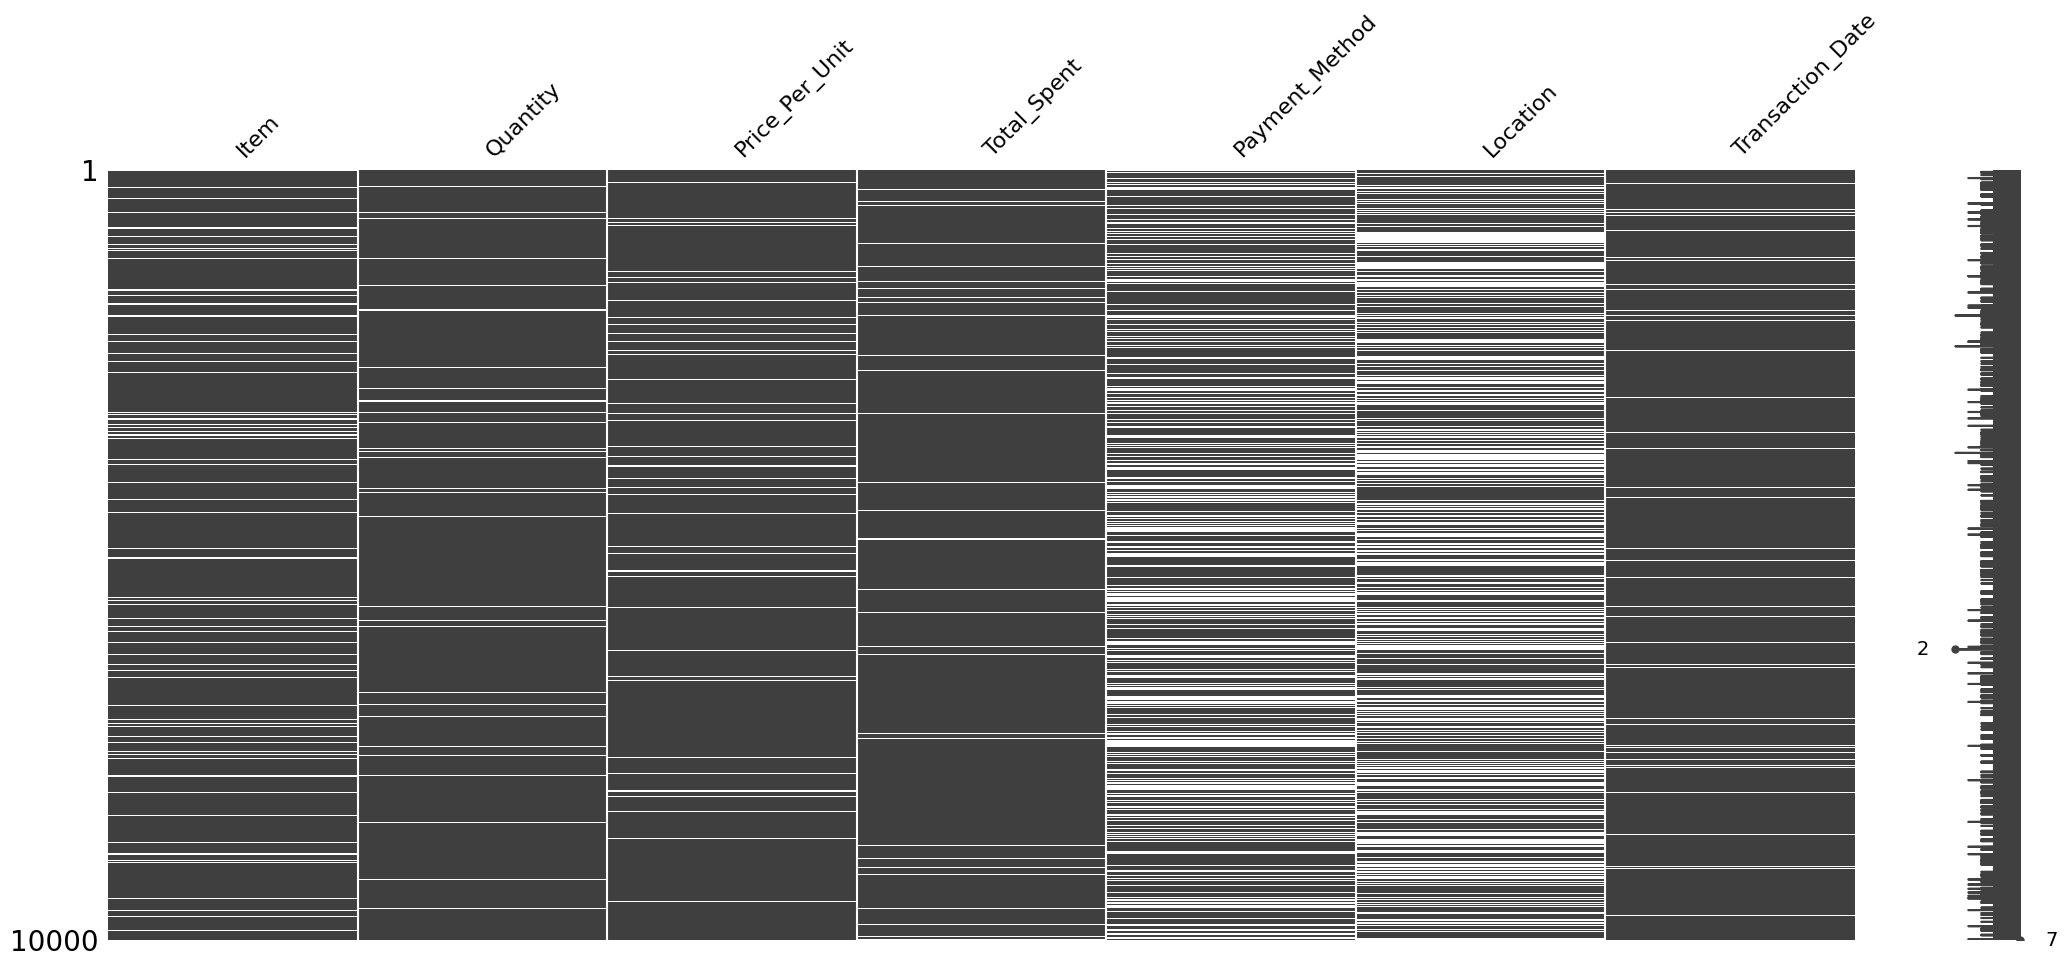

In [18]:
# Visualize the null values
mno.matrix(df_5)
plt.show()

In [19]:
# Return a subset where the Transaction Date feature contains null values
df_5[df_5['Transaction_Date'].isnull().values].head()

,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location,Transaction_Date
Transaction_ID,,,,,,,
TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,NaT
TXN_7640952,Cake,4.0,3.0,12.0,Digital Wallet,Takeaway,NaT
TXN_7710508,NaN,5.0,1.0,5.0,Cash,NaN,NaT
TXN_2091733,Salad,1.0,5.0,5.0,NaN,In-store,NaT
TXN_7028009,Cake,4.0,3.0,12.0,NaN,Takeaway,NaT


In [20]:
"""
Since the Transactional ID uniquely identifies each transaction and does not
provide any information about the transaction date—and none of the other
features offer sufficient context to deduce this information—any records with a
null value in the transactional date column must be removed.
"""
# Create a copy of the current dataframe
df_6 = df_5.copy()

# Drop the null values from the transaction date feature
df_6.dropna(subset=['Transaction_Date'], axis=0, inplace=True)


In [21]:
# Check the data has changed
df_6.isnull().sum()

,0
Item,927
Quantity,454
Price_Per_Unit,506
Total_Spent,476
Payment_Method,3015
Location,3779
Transaction_Date,0


In [22]:
"""
Use KNNImputation to impute the missing numeric features
Step 1: Identify the categorical features
Step 2: Use label encoding on the categorical features
Step 3: Use KNNImputation on the entire dataframe
Step 4: Convert the array back into a dataframe
Step 5: Invert back into string values
"""
# Create a copy of the current dataframe
df_7 = df_6.copy()

def category_encoding(
    dataframe: pd.DataFrame, features: list[str]
) -> pd.DataFrame:
  """
  This function performs category encoding on categorical features using
  Label Encoding, applies KNN imputation to fill missing values, and then
  converts encoded features back to their original categorical values.

  Parameters:
      dataframe (pd.DataFrame): The input dataframe containing the data with
                                missing values.
      features (list[str]): A list of column names corresponding to categorical
                            features that need to be encoded and imputed.

  Returns:
      pd.DataFrame: The dataframe with imputed categorical features restored
                    to their original values.
  """

  # Initialize a dictionary to store label encoders for each feature
  label_encoders = {}

  for feature in features:
    label_encoder = LabelEncoder()
    dataframe[feature] = dataframe[feature].fillna("Other") # Prevent NaN issues
    dataframe[feature] = label_encoder.fit_transform(dataframe[feature])
    label_encoders[feature] = label_encoder # Save encoder for later decoding

  # Separate datetime columns to avoid dtype issues
  datetime_cols = dataframe.select_dtypes(include=['datetime64']).columns
  datetime_df = dataframe[datetime_cols].copy()  # Preserve datetime columns
  dataframe = (
      dataframe.drop(columns=datetime_cols)  # Drop datetime columns imputation
  )

  def knn_Imputer(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    A function that instantiates an instance of the KNNImputer, which is used
    to fit and transform the dataframe passed as an argument. This function
    imputes missing values based on the K-nearest neighbors algorithm and
    returns the imputed dataframe.

    Parameters:
        dataframe (pd.DataFrame): The dataframe containing missing values that
        need to be imputed.

    Returns:
        pd.DataFrame: The dataframe with imputed values for the specified
        features.
    """
    imputer = KNNImputer(n_neighbors=3) # Instantiate the imputer
    imputed_data = imputer.fit_transform(dataframe)

    # Use the column sequence of the original dataframe
    imputed_df = pd.DataFrame(
        imputed_data, columns=dataframe.columns, index=dataframe.index
    )

    return imputed_df

  imputed_df = (
      knn_Imputer(dataframe)  # Store the imputed dataframe as a variable
  )

  for col in dataframe.columns:

    # Only apply inverse_transform to categorical features
    if col in label_encoders:
        imputed_df[col] = imputed_df[col].astype(int).round(0)
        imputed_df[col] = label_encoders[col].inverse_transform(imputed_df[col])
    else:
        imputed_df[col] = (
            # Keep numerical columns as they are
            imputed_df[col].astype(float).round(0)
        )

  # Merge datetime columns back
  new_imputed_df = pd.concat([imputed_df, datetime_df], axis=1)

  return new_imputed_df

In [23]:
# Store the categorical features of the dataframe
categorical_features = df_7.select_dtypes(include='object').columns

# Return the imputed dataframe
df_8 = category_encoding(df_7, categorical_features)

In [24]:
df_8.head()

,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location,Transaction_Date
Transaction_ID,,,,,,,
TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4.0,1.0,3.0,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2.0,5.0,10.0,Other,Other,2023-04-27
TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [25]:
# Return the total number of null values in the current dataframe
curr_df_nulls = np.count_nonzero(df_8.isnull().values)
print(f"{curr_df_nulls} null values found")

0 null values found


In [26]:
for feature in df_8.select_dtypes(include='object'):
  print(f'{df_8[feature].value_counts()}\n')

Item
Juice       1124
Coffee      1123
Salad       1099
Cake        1082
Sandwich    1075
Smoothie    1048
Cookie      1035
Tea         1027
Other        927
Name: count, dtype: int64

Payment_Method
Other             3015
Digital Wallet    2197
Credit Card       2170
Cash              2158
Name: count, dtype: int64

Location
Other       3779
Takeaway    2889
In-store    2872
Name: count, dtype: int64



### 2.3 **Outlier Values**

In [27]:
def outlier_Values(dataframe: pd.DataFrame, col: str, return_flag: Optional[bool]=False):
  """
  Identifies outliers in a given column of a Pandas DataFrame using the
  Interquartile Range (IQR) method.

  Parameters:
  - dataframe (pd.DataFrame):
    The DataFrame containing the data.
  - col (str):
    The column name for which outliers need to be detected.

  Returns:
  None

  Prints the number of outliers in the specified column.

  Method:
  - Calculates the first quartile (Q1) and third quartile (Q3).
  - Computes the interquartile range (IQR) as Q3 - Q1.
  - Determines the lower and upper bounds using 1.5 * IQR.
  - Identifies values outside these bounds as outliers.
  """
  # Find the IQR value
  q1 = dataframe[col].quantile(0.25)
  q3 = dataframe[col].quantile(0.75)
  iqr = q3 - q1

  # Find the upper and lower bounds
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)

  # Find the outliers
  outliers = dataframe[
      (dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)
  ].index.tolist()

  if len(outliers) > 0:
    print(f"There are {len(outliers)} outliers in {col}")
    if return_flag == True:
      return outliers
  else:
    print(f"There are no outliers in {col}")

In [28]:
# Return the total number of outliers in each of the numeric features
outlier_dct = {} # Instantiate an empty dictionary
for col in df_8.select_dtypes(include='number'):
  outlier_dct[col] = outlier_Values(df_8, col, return_flag=True)

There are no outliers in Quantity
There are no outliers in Price_Per_Unit
There are 256 outliers in Total_Spent


In [29]:
total_spent_outliers = [] # Instantiate an empty line
for key, value in outlier_dct.items():
  if value != None: # For keys with non null values

    # Extend the empty list by the non-null values
    total_spent_outliers.extend(value)

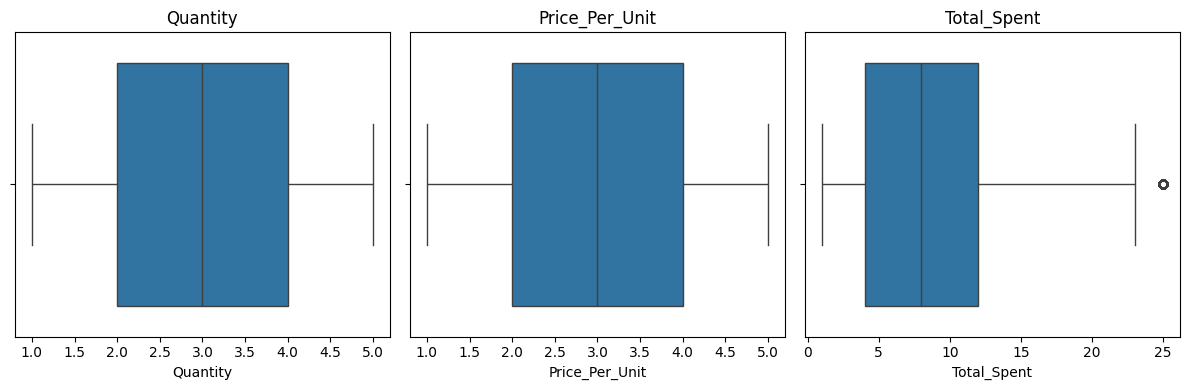

In [30]:
# Visualize the numeric features boxplots
_, fig = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(df_8.select_dtypes(include='number')):
  sns.boxplot(data=df_8, x=col, ax=fig[i])
  fig[i].set_title(col)

plt.tight_layout()
plt.show()

In [31]:
outlier_df = df_8.loc[total_spent_outliers]
outlier_df.head()

,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location,Transaction_Date
Transaction_ID,,,,,,,
TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
TXN_6342161,Salad,5.0,5.0,25.0,Other,Takeaway,2023-01-08
TXN_8914892,Other,5.0,5.0,25.0,Digital Wallet,Other,2023-03-15
TXN_5220895,Salad,5.0,5.0,25.0,Cash,In-store,2023-06-10
TXN_9517146,Other,5.0,5.0,25.0,Cash,Takeaway,2023-10-30


In [38]:
# Store the non_outlier index values
non_outlier_df = (
    df_8.loc[
        list(set(df_8.index.tolist()).difference(set(total_spent_outliers))),:
    ]
)

In [39]:
"""
Return the total number of records in the current version of the dataframe and
compare that value to the sum of the records of the outlier ad non-outlier
dataframe
"""
df_8.shape[0] == outlier_df.shape[0] + non_outlier_df.shape[0]

True

# **Exploratory Data Analysis**
___